<a href="https://colab.research.google.com/github/jinzus/DIVULGAZIONE-YOU-TUBE/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dependencies

import numpy as np
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from scipy.special import binom
from sklearn.cluster import KMeans
%matplotlib inline

(-0.1, 1.1, -0.1, 1.1)

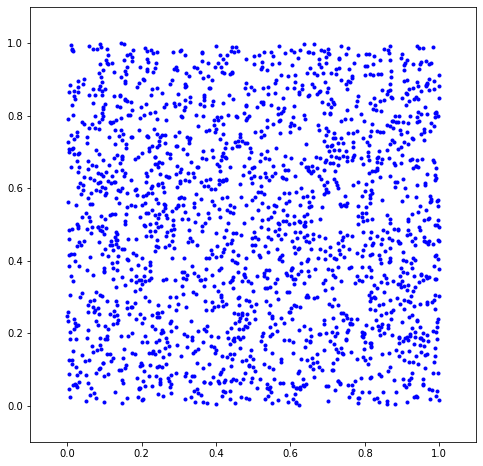

In [ ]:
np.random.seed(13)
numbers=np.random.rand(2000,2)
plt.figure(figsize=(8,8))
plt.plot(numbers[:,0],numbers[:,1],'b.')
plt.axis([-.1,1.1,-.1,1.1])

In [ ]:
def create_circle(points,center,radius):
  dummy=((points[:,0]-center[0])**2+(points[:,1]-center[1])**2)<radius**2
  return points[dummy]

(-0.1, 1.1, -0.1, 1.1)

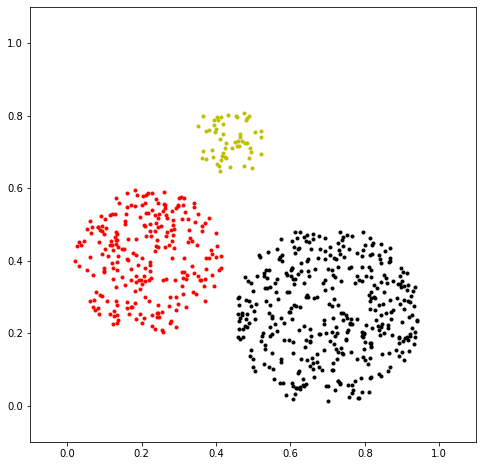

In [ ]:
c1=create_circle(numbers,[.22,.4],.2)
c2=create_circle(numbers,[.43,.73],.1)
c3=create_circle(numbers,[.7,.25],.25)
plt.figure(figsize=(8,8))
plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'y.')
plt.plot(c3[:,0],c3[:,1],'k.')
plt.axis([-.1,1.1,-.1,1.1])

(-0.1, 1.1)

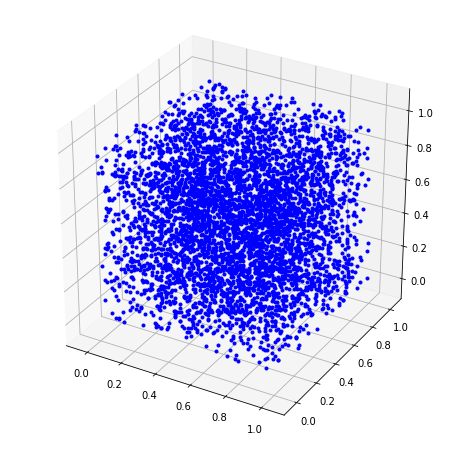

In [ ]:
np.random.seed(13)
numbers=np.random.rand(5000,3)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
ax.plot(numbers[:,0],numbers[:,1],numbers[:,2],'b.')
ax.set_xlim(-.1,1.1)
ax.set_ylim(-.1,1.1)
ax.set_zlim(-.1,1.1)

In [ ]:
def create_sphere(points,center,radius):
  dummy=((points[:,0]-center[0])**2+(points[:,1]-center[1])**2)+(points[:,2]-center[2])**2<radius**2
  return points[dummy]

def shuffle_data(features,labels,seed=32):
  dataset=np.concatenate((features,labels[:,np.newaxis]),axis=-1)
  np.random.seed(seed)
  dataset=np.random.permutation(dataset)
  return dataset[:,:-1],dataset[:,-1].astype(np.int16)

def computeVariation(dataset,labels):
  for cl in np.unique(labels):
    variation=0
    for var in range(dataset.shape[-1]):
      variation+=np.std(dataset[labels==cl,var])
    print("Variazione totale cluster/sfera {:d}: {:.2f}".format(cl,variation))

In [ ]:
# [0.2,0.35,0.12]
# [.2,.31,.13]
# [.25,.25,.25]

sfera1=create_sphere(numbers,[.22,.31,.2],.2)
sfera2=create_sphere(numbers,[.53,.76,.41],.35)
sfera3=create_sphere(numbers,[.7,.23,.7],.12)
sfere=np.concatenate((sfera1,sfera2,sfera3),axis=0)

primoC=np.zeros(len(sfera1))
secondoC=np.ones(len(sfera2))
terzoC=2*np.ones(len(sfera3))
targets=np.concatenate((primoC,secondoC,terzoC))

sfere,targets=shuffle_data(sfere,targets)

Variazione totale cluster/sfera 0: 0.26
Variazione totale cluster/sfera 1: 0.46
Variazione totale cluster/sfera 2: 0.16


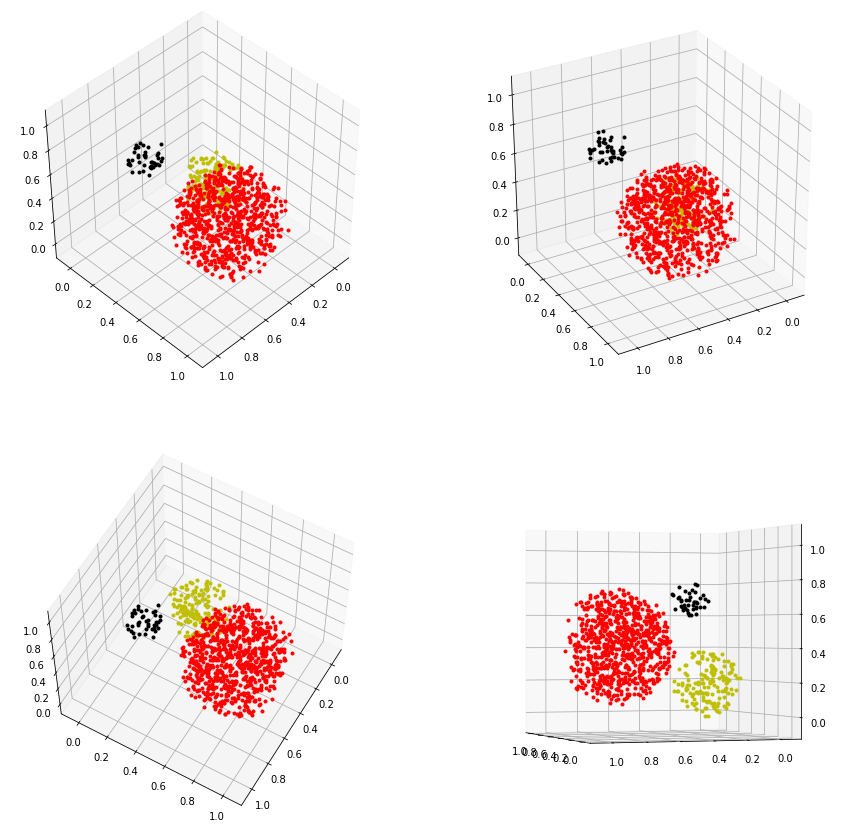

In [ ]:
angoli=((45,45),(30,60),(60,30),(0,160))
def plot_spheres(dataset,labels,posizioni,centers=None):
  fig=plt.figure(figsize=(15,15))
  for indice in range(len(angoli)):
    ax=fig.add_subplot(221+indice,projection='3d')
    ax.plot(dataset[labels==0,0],dataset[labels==0,1],dataset[labels==0,2],'y.')
    ax.plot(dataset[labels==1,0],dataset[labels==1,1],dataset[labels==1,2],'r.')
    ax.plot(dataset[labels==2,0],dataset[labels==2,1],dataset[labels==2,2],'k.')
    if centers is not None:
      for center in centers:
        ax.plot(center[0,np.newaxis],center[1,np.newaxis],center[2,np.newaxis],'bo',ms=12)
    ax.set_xlim(-.1,1.1)
    ax.set_ylim(-.1,1.1)
    ax.set_zlim(-.1,1.1)
    ax.view_init(posizioni[indice][0],posizioni[indice][1])

plot_spheres(sfere,targets,angoli)
computeVariation(sfere,targets)

In [ ]:
def compute_inertia(centers,data,mins,TP=False):
  inertia=0
  for index,center in enumerate(centers):
    for item in data[mins==index]:
      inertia+=euclidean(item,center)**2
  if TP:
    print("Inerzia finale: {:.2f}".format(inertia))
  else:
    return inertia 

def K_Means(dataset,n_centers=3,centroids=None,seed=22):
  if centroids is None:
    np.random.seed(seed)
    centroids=dataset[np.random.randint(0,len(dataset),n_centers)]
  for _ in range(500):
    distances=distance_matrix(dataset,centroids)
    minimums=np.argmin(distances,axis=-1)
    for centroid in range(len(centroids)):
      centroids[centroid]=np.mean(dataset[minimums==centroid],axis=0)
  return centroids,minimums

Variazione totale cluster/sfera 0: 0.30
Variazione totale cluster/sfera 1: 0.41
Variazione totale cluster/sfera 2: 0.43


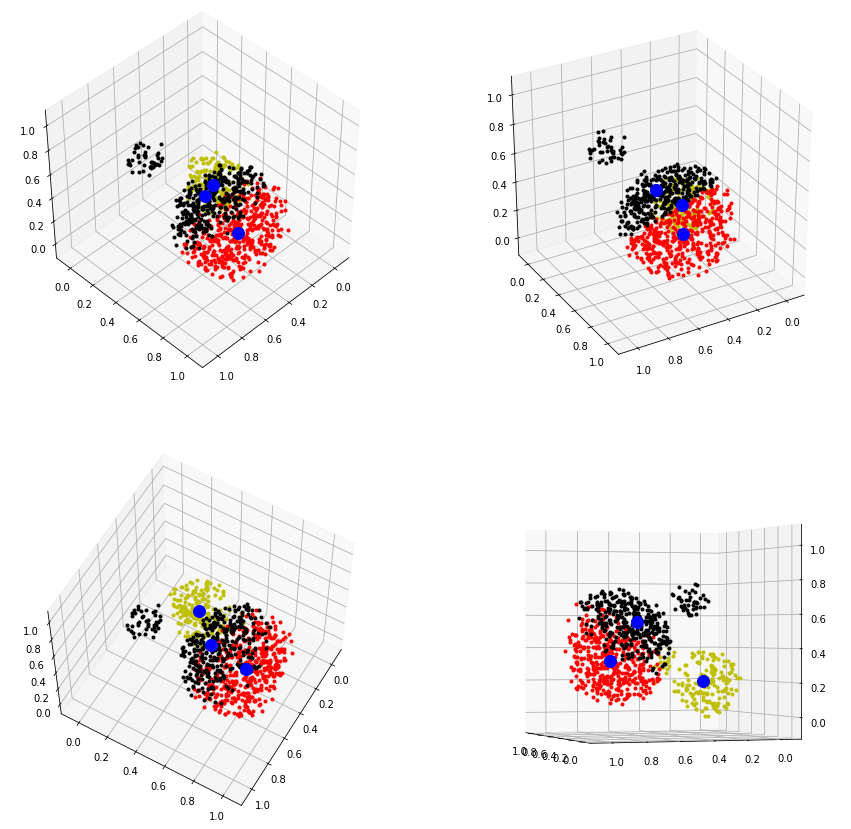

In [ ]:
centri,targets=K_Means(sfere)
plot_spheres(sfere,targets,angoli,centri)
computeVariation(sfere,targets)

PESSIMA INIZIALIZZAZIONE

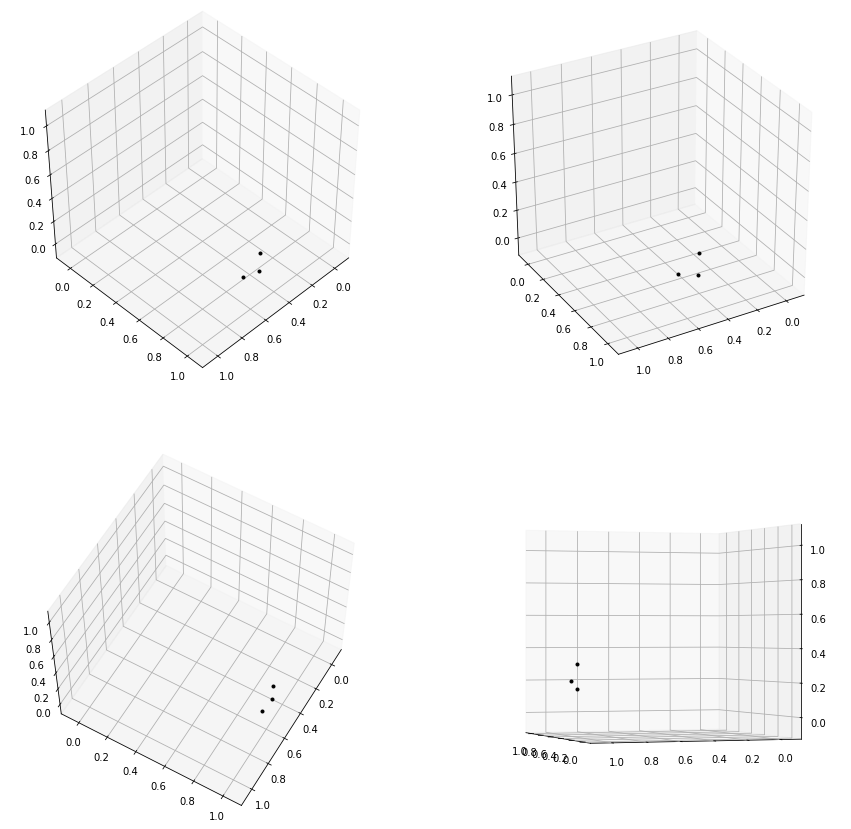

In [ ]:
axis=1
sorted=np.flip(np.sort(sfere[:,axis]))
badInit=np.empty((3,sfere.shape[-1]))
for index,item in enumerate(sorted[:3]):
  badInit[index]=sfere[np.argwhere(sfere[:,axis]==item)[0,0]]

plot_spheres(badInit,np.array([2,2,2]),angoli)

Inerzia finale: 54.09


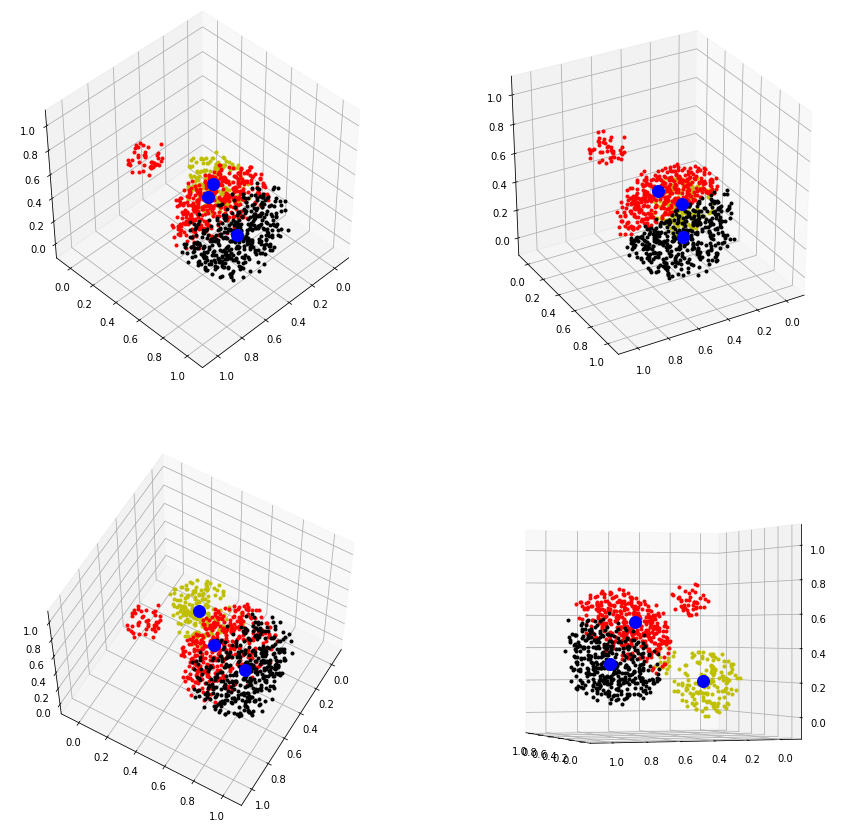

In [ ]:
centri,targets=K_Means(sfere,centroids=badInit)
plot_spheres(sfere,targets,angoli,centri)
compute_inertia(centri,sfere,targets,True)

Inerzia finale: 54.09


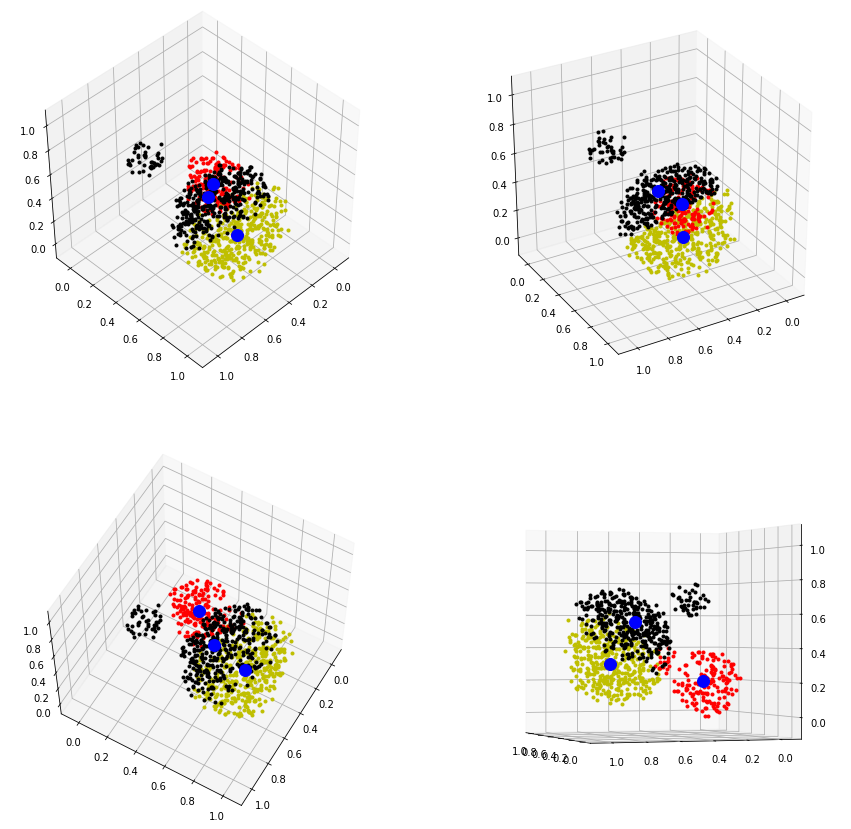

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(sfere)

plot_spheres(sfere,kmeans.labels_,angoli,kmeans.cluster_centers_)
compute_inertia(kmeans.cluster_centers_,sfere,kmeans.labels_,True)

C++

In [ ]:
np.random.seed(111)
points=np.random.rand(10000,3)

In [ ]:
def file_writer(pathname,data):
  with open(pathname,'a') as File:
    for i,line in enumerate(data):
      for number in line:
        File.write(str(number)+' ')
      if i<len(data)-1:
        File.write('\n')

In [ ]:
file_writer("/content/cerchiInSample.txt",sfere)
file_writer("/content/cerchiOutOfSample.txt",points)

In [ ]:
def file_reader(pathname):
  with open(pathname,'r') as File:
    reader=File.readlines()
  allElements=[]
  for line in reader:
    allElements.append(float(line))
  return allElements

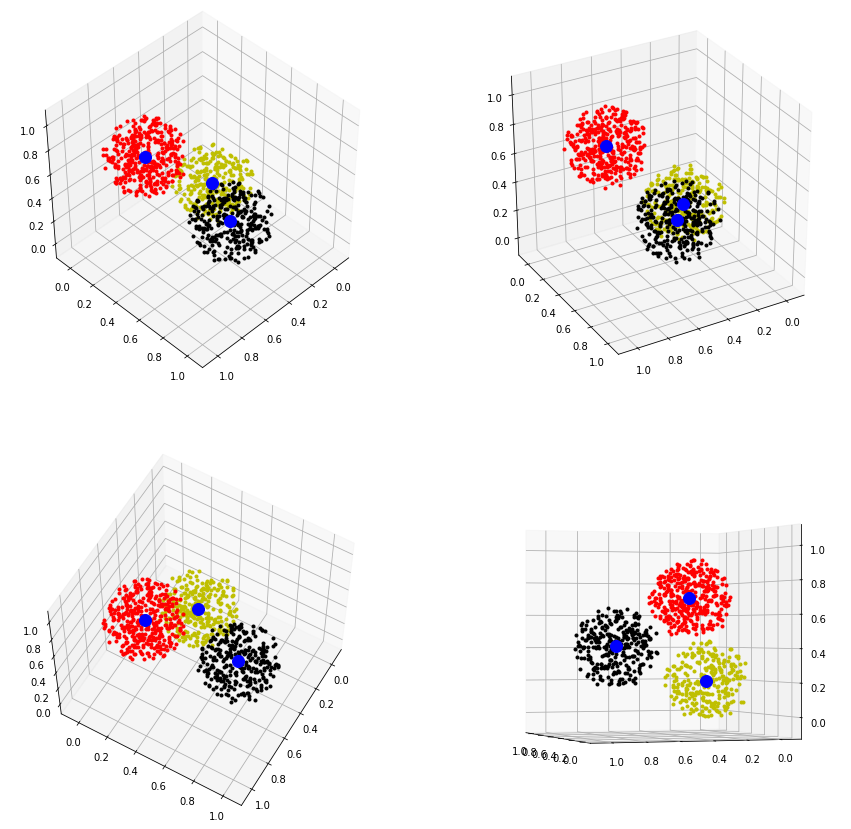

In [ ]:
centri=np.reshape(file_reader("/content/centroids.txt"),(3,3))
targets=np.array(file_reader("/content/labelsInSample.txt"))
plot_spheres(sfere,targets,angoli,centri)

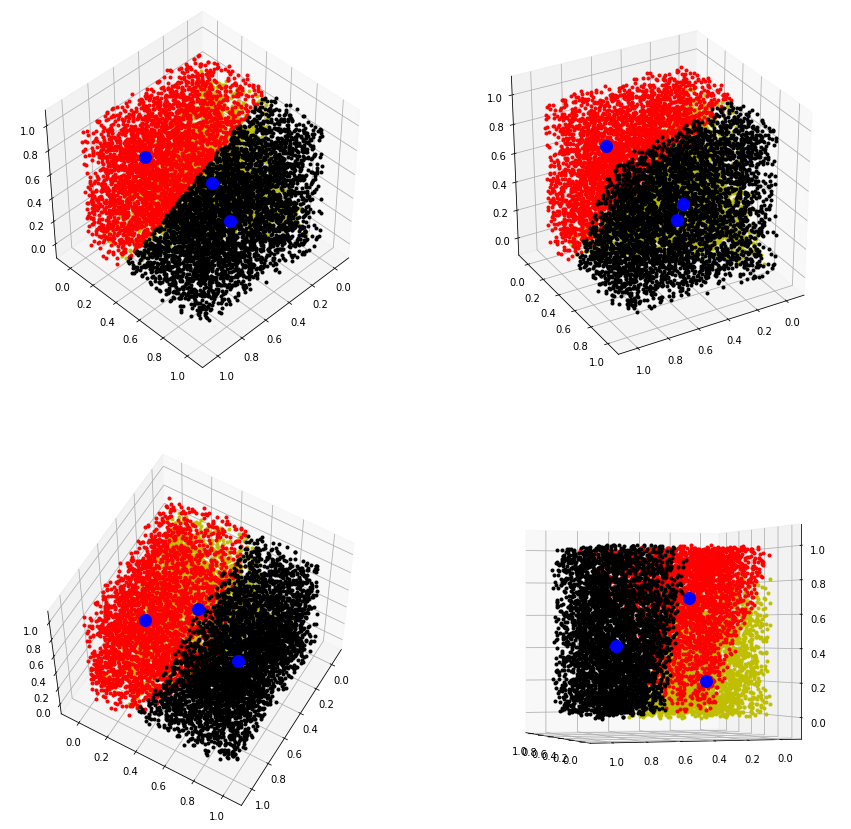

In [ ]:
targets=np.array(file_reader("/content/labelsOutOfSample.txt"))
plot_spheres(points,targets,angoli,centri)

TEST CON IRIS DATA

In [ ]:
from sklearn import datasets
iris=datasets.load_iris()

In [ ]:
def get_features(n_features):
  collection=np.empty((int(binom(n_features,3)),3))
  row=0
  for i in range(int(binom(n_features,3))):
    for j in range(int(binom(n_features,3))):
      for k in range(int(binom(n_features,3))):
        if (i<j) and (j<k):
          collection[row]=[i,j,k]
          row+=1
  return collection.astype(np.int)

get_features(4)

array([[0, 1, 2],
       [0, 1, 3],
       [0, 2, 3],
       [1, 2, 3]])

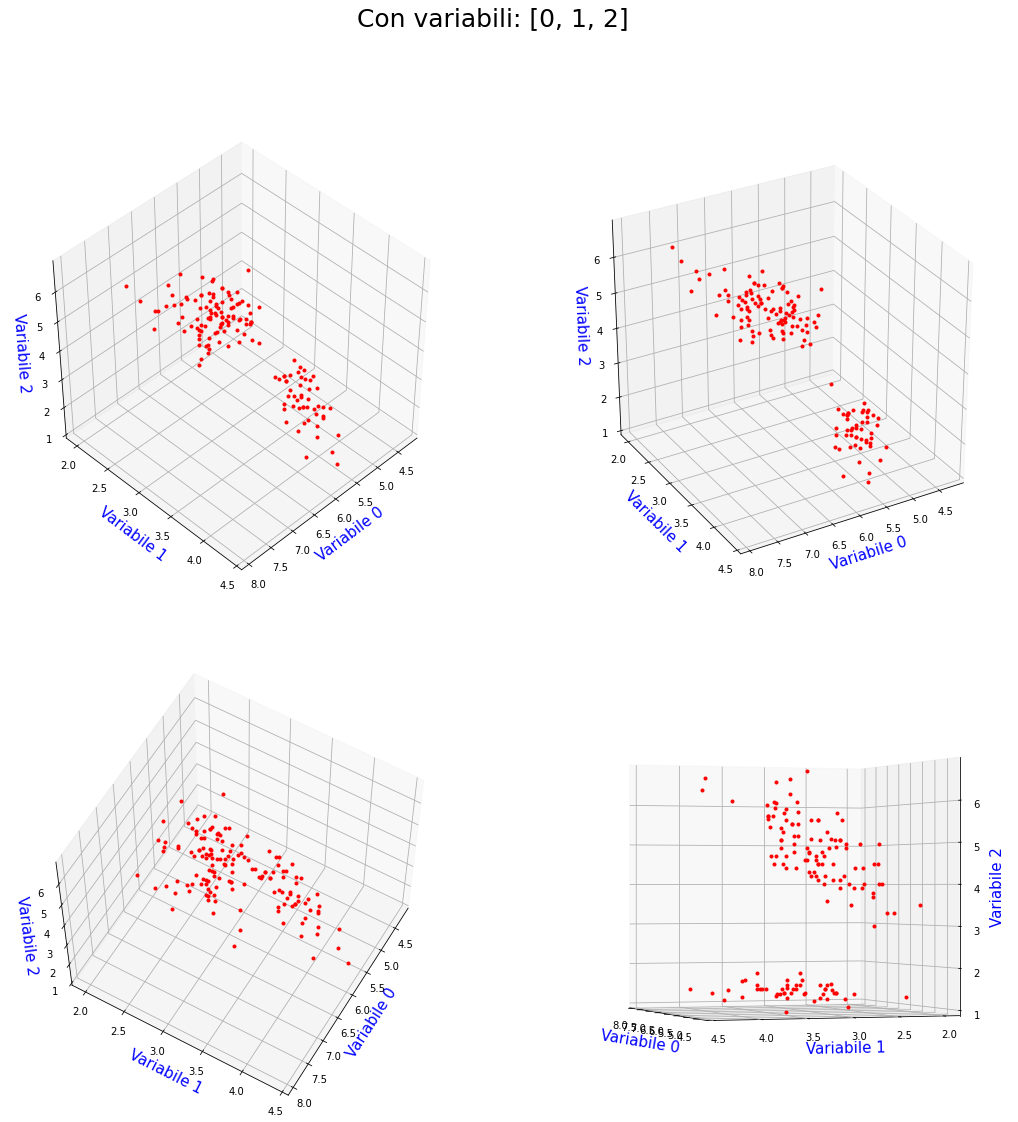

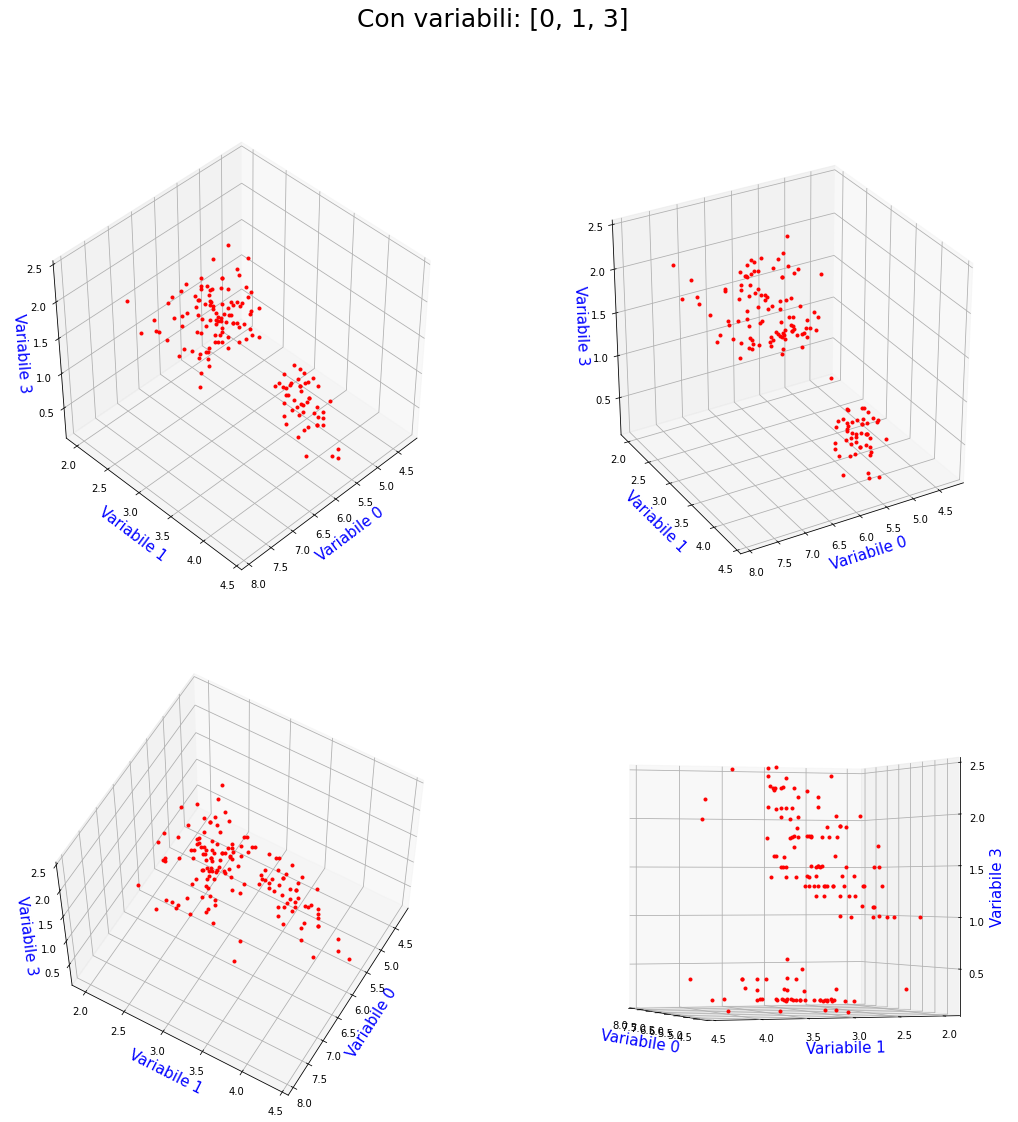

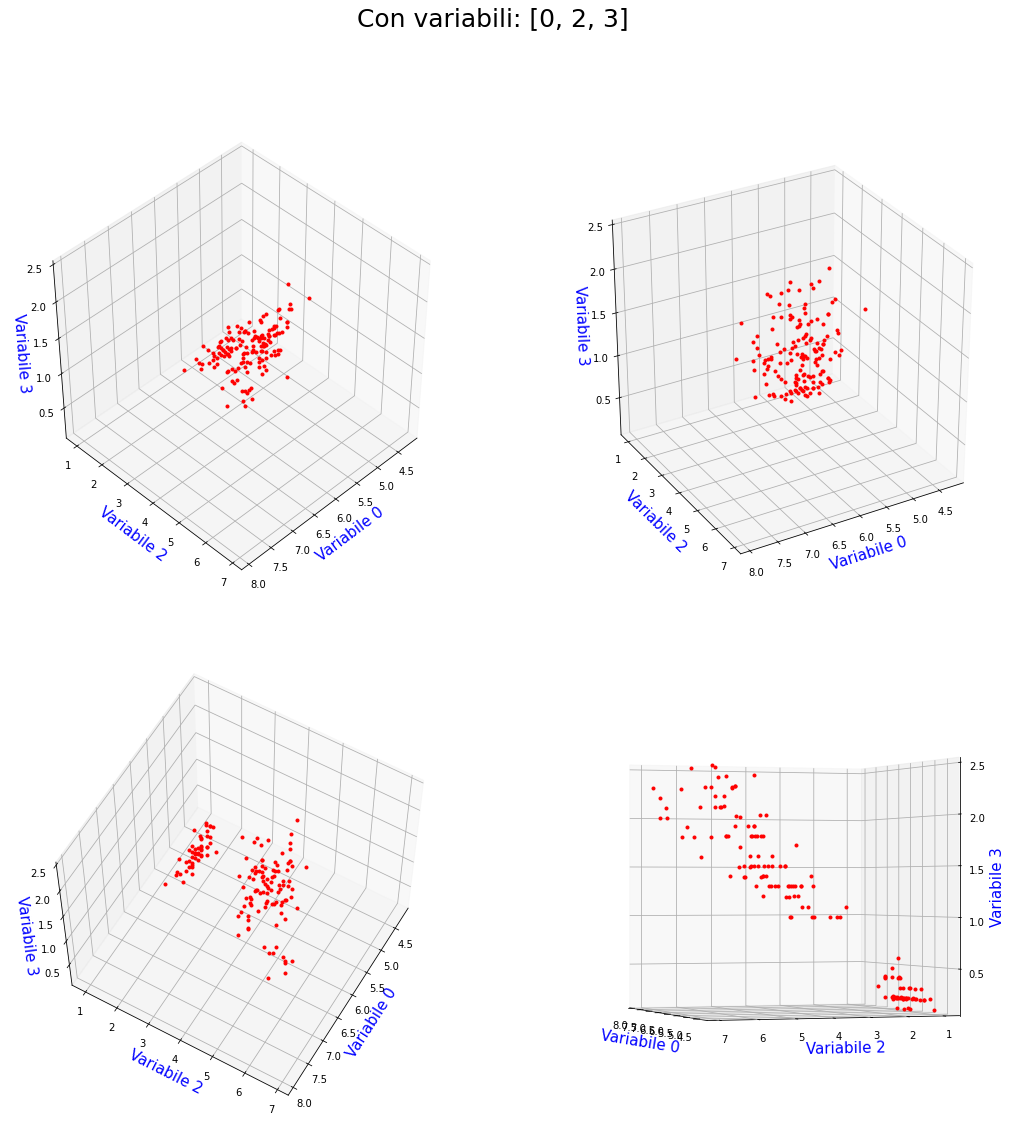

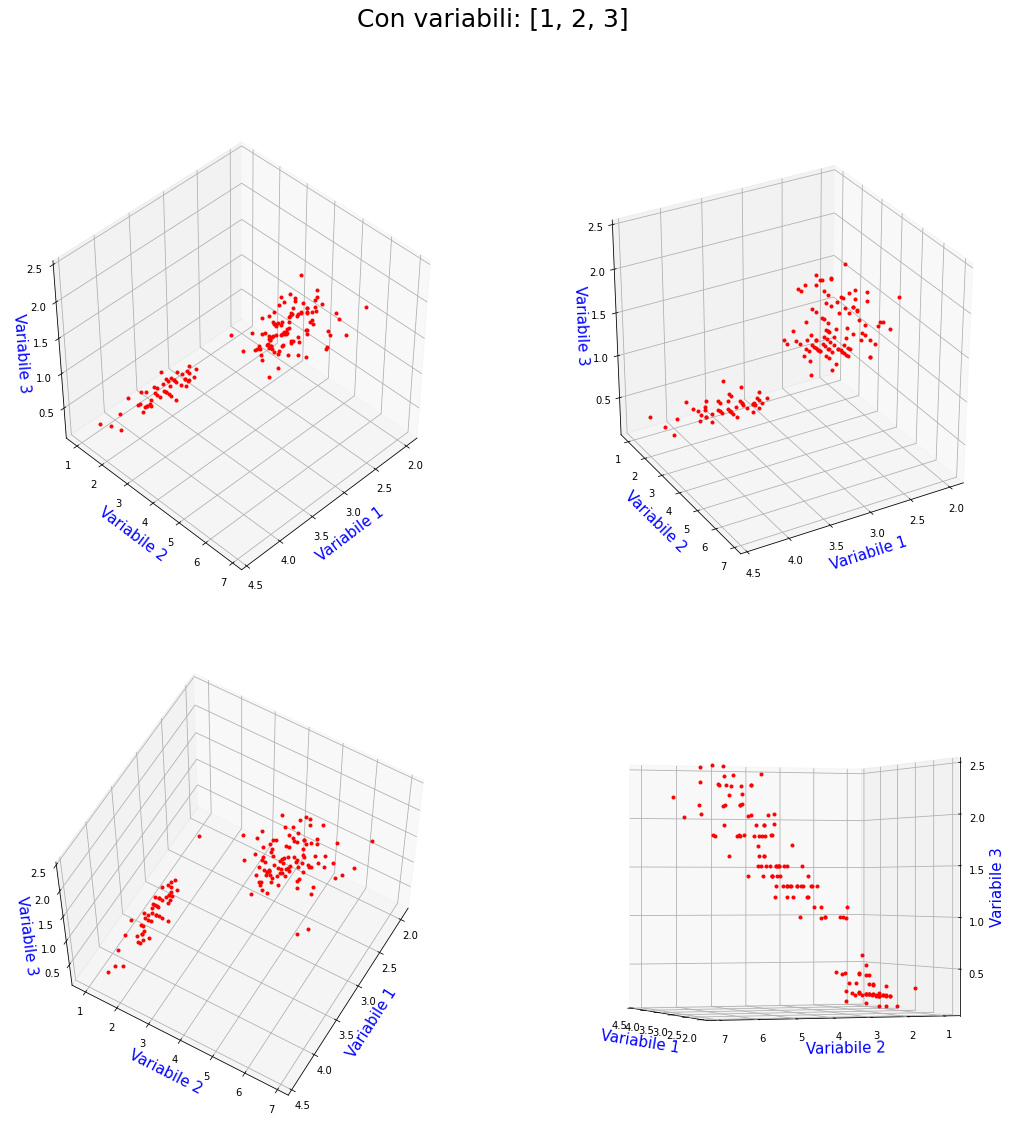

In [ ]:
def plot_points(all_features,angles,target):
  for o_index in range(len(all_features)):
    fig=plt.figure(figsize=(18,18))
    fig.suptitle("Con variabili: "+repr(list(all_features[o_index])),fontsize=25)
    for i_index in range(len(angles)):
      ax=fig.add_subplot(221+i_index,projection='3d')
      ax.plot(iris_data[:,all_features[o_index,0]][target==0],iris_data[:,all_features[o_index,1]][target==0],iris_data[:,all_features[o_index,2]][target==0],'r.')
      ax.plot(iris_data[:,all_features[o_index,0]][target==1],iris_data[:,all_features[o_index,1]][target==1],iris_data[:,all_features[o_index,2]][target==1],'y.')
      ax.plot(iris_data[:,all_features[o_index,0]][target==2],iris_data[:,all_features[o_index,1]][target==2],iris_data[:,all_features[o_index,2]][target==2],'k.')
      ax.set_xlabel("Variabile {:d}".format(all_features[o_index,0]),fontsize=15,color='b')
      ax.set_ylabel("Variabile {:d}".format(all_features[o_index,1]),fontsize=15,color='b')
      ax.set_zlabel("Variabile {:d}".format(all_features[o_index,2]),fontsize=15,color='b')
      ax.view_init(angles[i_index][0],angles[i_index][1])

iris_data=iris.data
labels=np.zeros(len(iris_data))
variabili=get_features(iris_data.shape[-1])
plot_points(variabili,angoli,labels)

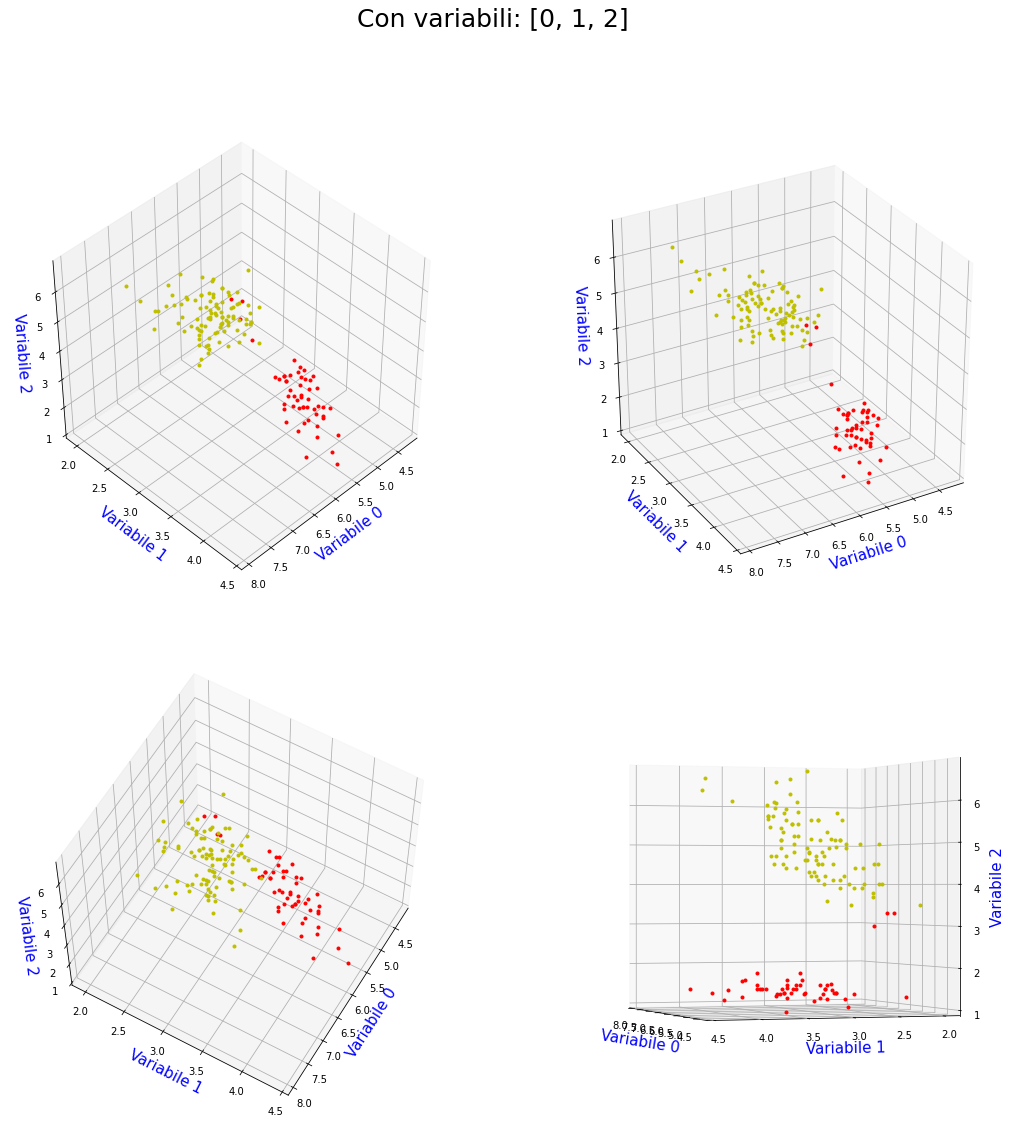

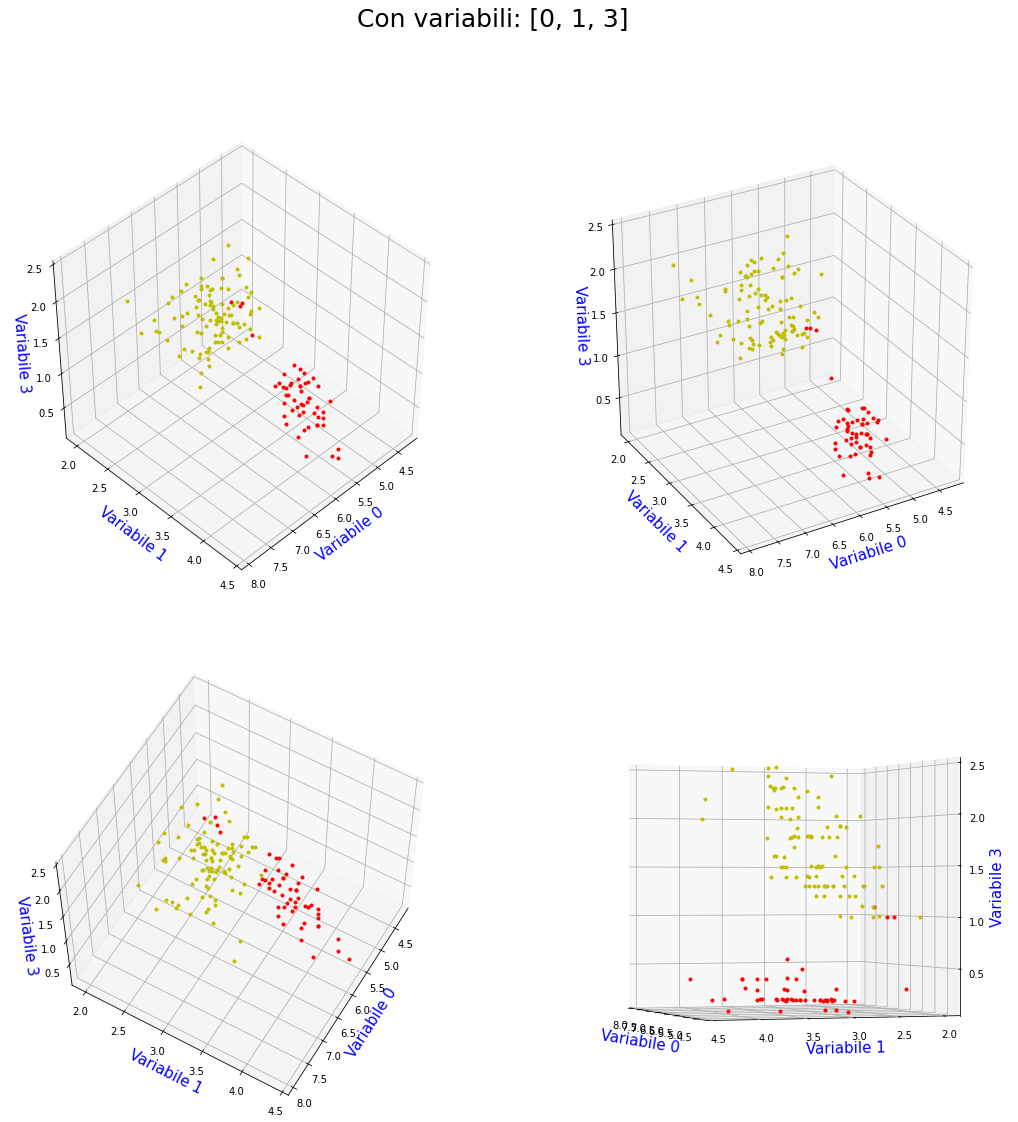

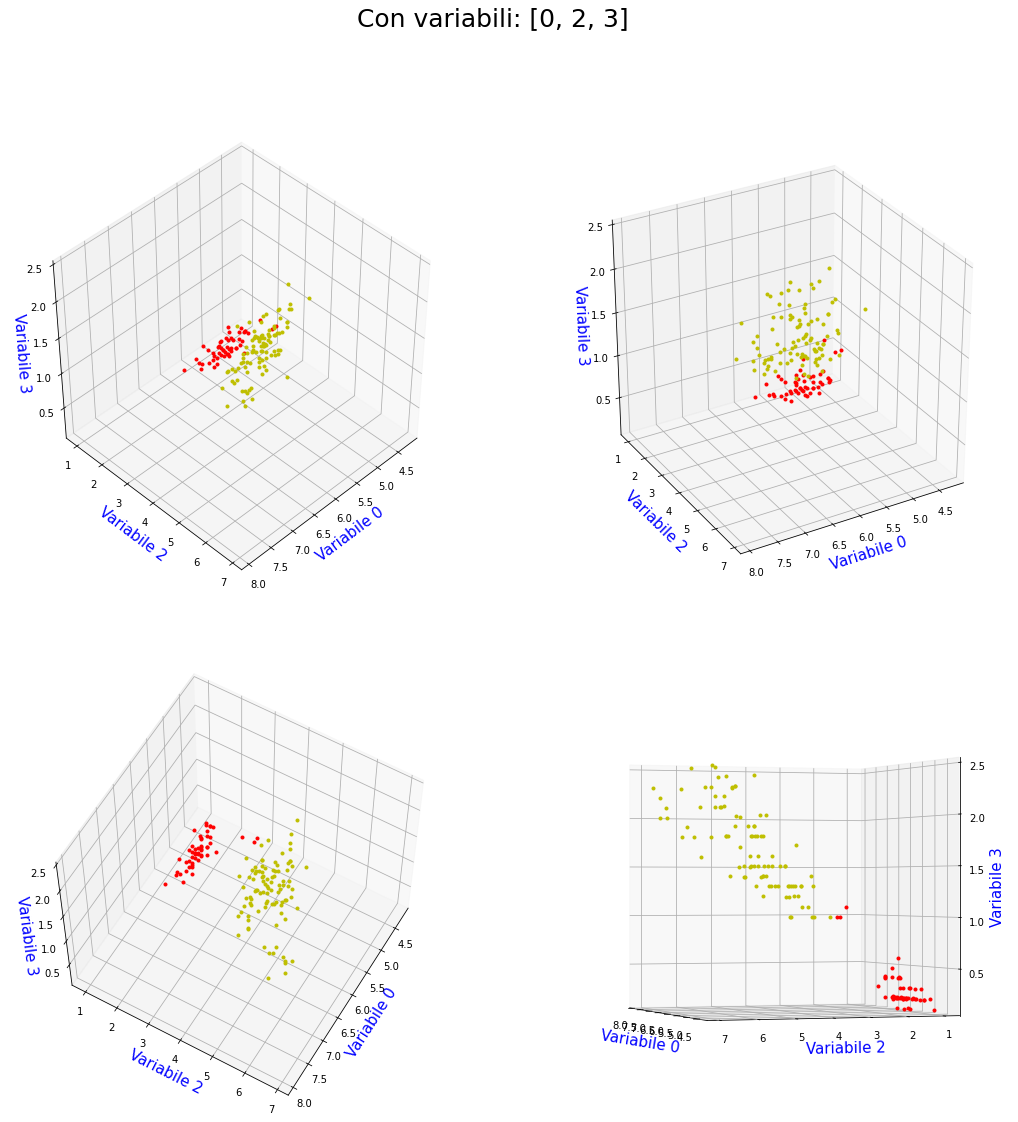

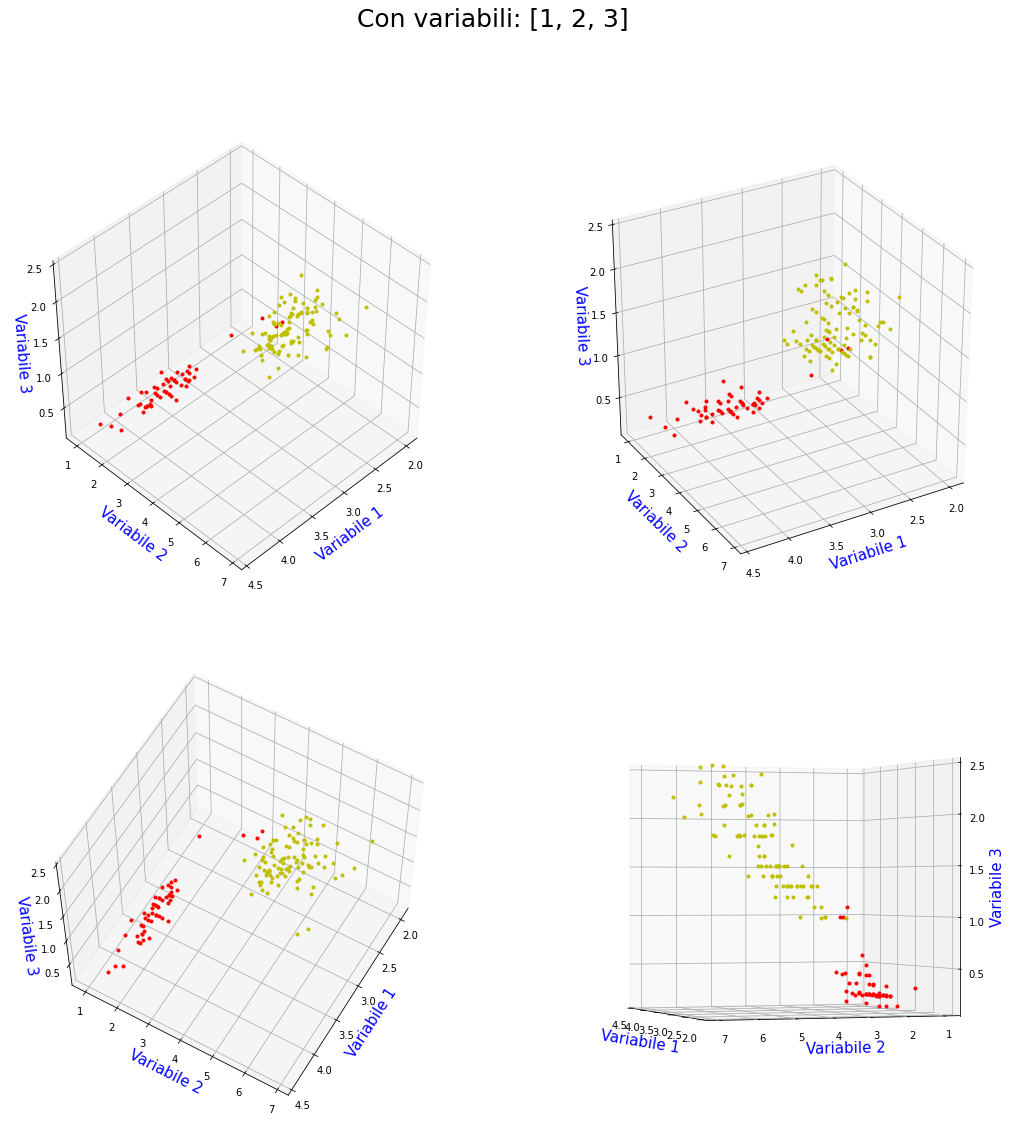

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(iris_data)
plot_points(get_features(iris_data.shape[-1]),angoli,kmeans.labels_)

Text(0, 0.5, 'Inertia')

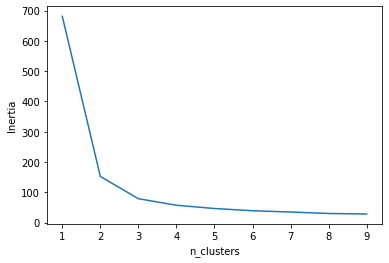

In [ ]:
inertias=[]
for index in range(1,10):
  kmeans=KMeans(n_clusters=index)
  kmeans.fit(iris_data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)
plt.xlabel("n_clusters")
plt.ylabel("Inertia")